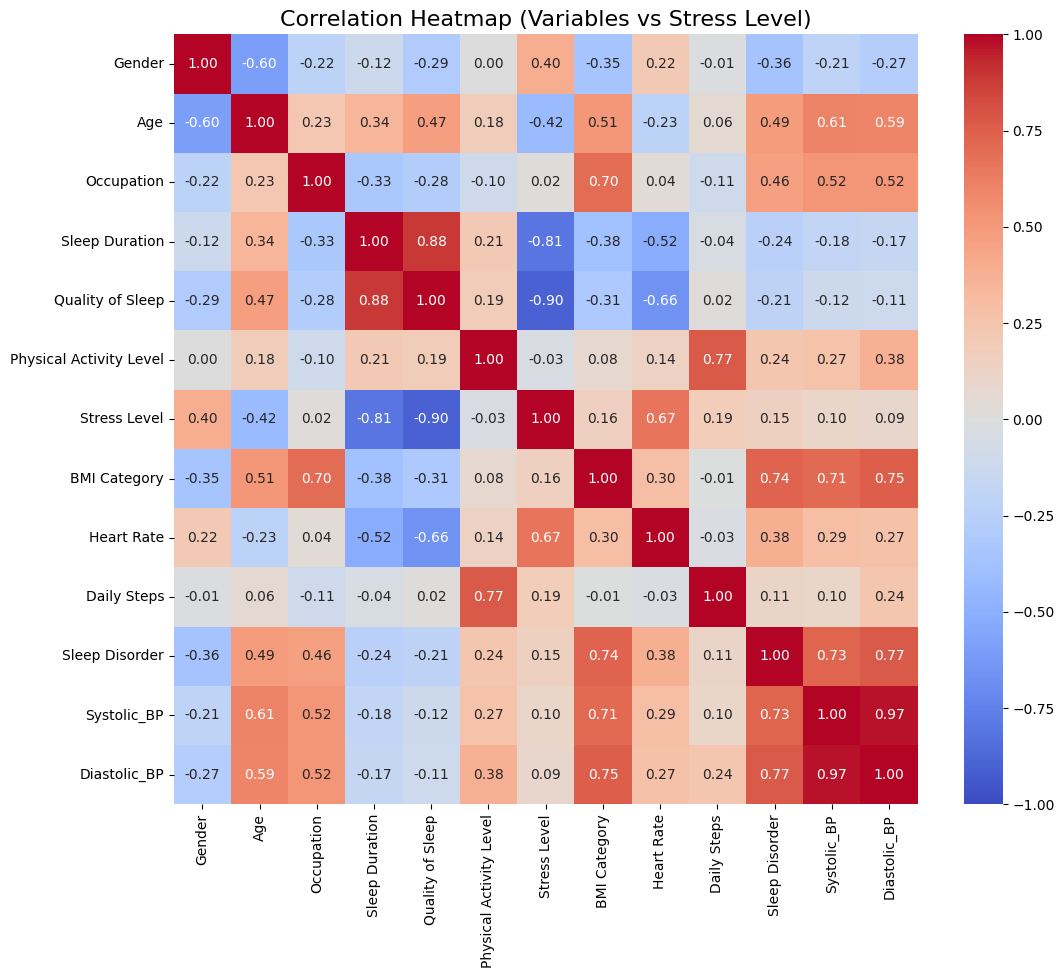


[ Correlation with Stress Level ]
Stress Level               1.000000
Heart Rate                 0.670026
Gender                     0.396018
Daily Steps                0.186829
BMI Category               0.163895
Sleep Disorder             0.151893
Systolic_BP                0.102818
Diastolic_BP               0.091811
Occupation                 0.021123
Physical Activity Level   -0.034134
Age                       -0.422344
Sleep Duration            -0.811023
Quality of Sleep          -0.898752
Name: Stress Level, dtype: float64


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ==========================================
# 1. Data Preparation for Heatmap
# ==========================================
file_path = 'Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(file_path)

# Drop ID
df = df.drop(columns=['Person ID'], errors='ignore')

# Split Blood Pressure
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)
df = df.drop(columns=['Blood Pressure'])

# Convert categorical text to numbers temporarily for correlation calculation
# (e.g., Gender: Male=1, Female=0)
df_numeric = df.copy()
for col in df_numeric.select_dtypes(include='object').columns:
    df_numeric[col] = df_numeric[col].astype('category').cat.codes

# ==========================================
# 2. Calculate Correlation & Plot Heatmap
# ==========================================
plt.figure(figsize=(12, 10))

# Calculate correlation with all columns
correlation_matrix = df_numeric.corr()

# Create Heatmap
# annot=True: Show numbers
# cmap='coolwarm': Red=Positive, Blue=Negative
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Heatmap (Variables vs Stress Level)', fontsize=16)
plt.show()

# Show specific correlation with Stress Level
print("\n[ Correlation with Stress Level ]")
print(correlation_matrix['Stress Level'].sort_values(ascending=False))


🔍 Feature Selection (Threshold > 0.3)
Selected Features: ['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Heart Rate']
(Dropped Features: ['Daily Steps', 'Sleep Disorder', 'Physical Activity Level', 'BMI Category', 'Diastolic_BP', 'Occupation', 'Systolic_BP'])

📊 Refined Model Performance
MAE (Error): 0.051
R2 Score:    0.991


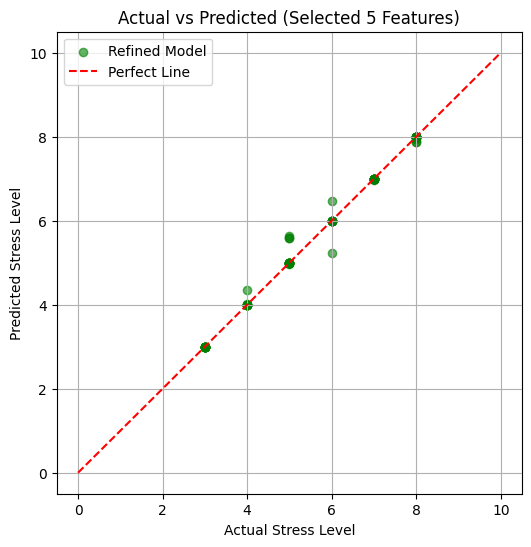

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# ==========================================
# 3. Feature Selection based on Correlation
# ==========================================

THRESHOLD = 0.3

# Get absolute correlation values with Stress Level
target = 'Stress Level'
correlations = df_numeric.corr()[target].abs()

# Select features that satisfy the threshold (excluding the target itself)
selected_features = correlations[correlations > THRESHOLD].index.tolist()
if target in selected_features:
    selected_features.remove(target)

print("\n" + "="*50)
print(f"🔍 Feature Selection (Threshold > {THRESHOLD})")
print("="*50)
print(f"Selected Features: {selected_features}")

dropped_features = list(set(df_numeric.columns) - set(selected_features) - {target})
print(f"(Dropped Features: {dropped_features})")

# ==========================================
# 4. Retrain Model with Selected Features
# ==========================================

# Prepare X (Features) and y (Target)
X = df_numeric[selected_features]
y = df_numeric[target]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model_refined = RandomForestRegressor(n_estimators=100, random_state=42)
model_refined.fit(X_train, y_train)

# Evaluate
y_pred = model_refined.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n" + "="*50)
print("📊 Refined Model Performance")
print("="*50)
print(f"MAE (Error): {mae:.3f}")
print(f"R2 Score:    {r2:.3f}")

# Visualize Comparison
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green', label='Refined Model')
plt.plot([0, 10], [0, 10], color='red', linestyle='--', label='Perfect Line')
plt.title(f'Actual vs Predicted (Selected {len(selected_features)} Features)')
plt.xlabel('Actual Stress Level')
plt.ylabel('Predicted Stress Level')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# ==========================================
# 1. Training with ONLY Selected Features
# ==========================================
print("🚀 Initializing Specialized AI System...")

# Load Data
file_path = 'Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(file_path)

# --- Define the Features to use (Hardcoded based on selection) ---
selected_features = ['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Heart Rate']
target = 'Stress Level'

print(f"✅ Selected Features: {selected_features}")

# --- Preprocessing (Encoding) ---
# Gender: Convert text to numbers manually to ensure consistency
# (assuming Male=1, Female=0 or similar)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Prepare Training Data
X = df[selected_features]
y = df[target]

# Train Model
print("🧠 Training Model on selected attributes...")
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)
print("✅ Training Complete.")

# ==========================================
# 2. User Diagnosis (Specialized)
# ==========================================
print("\n" + "="*50)
print("🩺 Stress Diagnosis (5 Key Questions)")
print("="*50)

def get_user_input():
    try:
        print("Please answer the following 5 questions:")

        # 1. Gender
        g_in = input("1. Gender (Male / Female): ").strip()
        gender_val = 1 if g_in.lower() == 'male' else 0

        # 2. Age
        age_val = float(input("2. Age: "))

        # 3. Sleep Duration
        sleep_dur = float(input("3. Sleep Duration (hours, e.g. 6.0): "))

        # 4. Quality of Sleep
        sleep_qual = float(input("4. Quality of Sleep (1-10): "))

        # 5. Heart Rate
        hr_val = float(input("5. Heart Rate (bpm, e.g. 70): "))

        # Create DataFrame for prediction
        return pd.DataFrame({
            'Gender': [gender_val],
            'Age': [age_val],
            'Sleep Duration': [sleep_dur],
            'Quality of Sleep': [sleep_qual],
            'Heart Rate': [hr_val]
        })
    except:
        print("Error: Invalid input.")
        return None

user_df = get_user_input()

if user_df is not None:
    # Predict
    current_pred = model.predict(user_df)[0]

    print("\n" + "*"*40)
    print(f"🎯 Predicted Stress Level: {current_pred:.2f} / 10.0")
    print("*"*40)

    # ==========================================
    # 3. Targeted Simulation (Sleep Only)
    # ==========================================
    # Since 'Daily Steps' was excluded from the features,
    # the AI has determined that walking does not significantly impact stress
    # compared to these 5 factors. Therefore, we focus on SLEEP.

    print("\n[ Improvement Simulation ]")

    # Simulate Sleep +1 hour
    sim_sleep = user_df.copy()
    sim_sleep['Sleep Duration'] += 1.0
    # Usually, if sleep duration improves, sleep quality might also improve.
    # Let's simulate a slight increase in quality too (optional, but realistic).
    if sim_sleep['Quality of Sleep'][0] < 10:
        sim_sleep['Quality of Sleep'] += 1.0

    new_pred = model.predict(sim_sleep)[0]
    diff = current_pred - new_pred

    if diff > 0:
        print(f"🛌 If you sleep +1 hour (and improve quality):")
        print(f"   -> New Stress Level: {new_pred:.2f} (Improved by {diff:.2f} points)")
        print("   💡 ADVICE: Your data confirms that SLEEP is the key factor.")
    else:
        print(f"   -> No significant change predicted ({new_pred:.2f}).")
        print("   💡 ADVICE: Your stress seems stable against sleep changes.")

    print("="*50)

🚀 Initializing Specialized AI System...
✅ Selected Features: ['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Heart Rate']
🧠 Training Model on selected attributes...
✅ Training Complete.

🩺 Stress Diagnosis (5 Key Questions)
Please answer the following 5 questions:
1. Gender (Male / Female): Male
2. Age: 31
3. Sleep Duration (hours, e.g. 6.0): 6
4. Quality of Sleep (1-10): 8
5. Heart Rate (bpm, e.g. 70): 84

****************************************
🎯 Predicted Stress Level: 3.87 / 10.0
****************************************

[ Improvement Simulation ]
🛌 If you sleep +1 hour (and improve quality):
   -> New Stress Level: 3.50 (Improved by 0.37 points)
   💡 ADVICE: Your data confirms that SLEEP is the key factor.
